# Trabajo semanal 8
## MAI - Filtros digitales
***Juan Costa Suárez***

---

![imagen](img/Circuito.jpg)


### Enunciado:
1) Obtener la transferencia de tensión fracción V subíndice o entre V subíndice i por método de cuadripolos (se sugiere referirse a alguno de los métodos de interconexión ya vistos). Ayuda: si C subíndice 2 igual fracción 4 entre 3 (se utilizó 1.333 para la simulación), los polos de la transferencia están ubicados sobre una circunferencia de radio unitario.

2) Valide la transferencia con simulación circuital.

3) Construya la matriz de admitancia indefinida (MAI) del circuito

4) Compute la transferencia de tensión con la MAI




In [10]:
from IPython.display import IFrame
IFrame("img/Circuito.jpg", width=600, height=300)

# Resolución de punto 1 y 2:

In [2]:
from IPython.display import IFrame
IFrame("pdf/Análisis_Cuadripolos.pdf", width=600, height=800)

In [3]:
# módulos genericos
import numpy as np
from scipy import signal as sig
from splane import analyze_sys, pretty_print_bicuad_omegayq


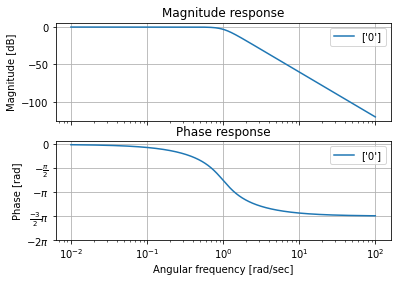

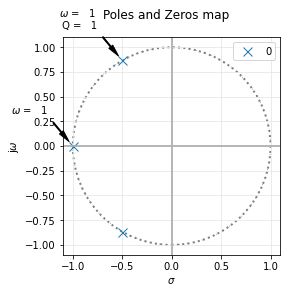

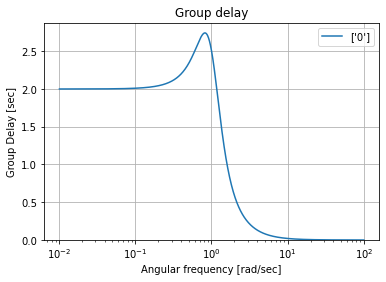

In [4]:
### SIMULACIÓN NUMÉRCIA###

num = np.array(1) 
den = np.array([1,2,2,1])
    
mi_sos = sig.TransferFunction(num,den)
analyze_sys(mi_sos)

# Simulación en LTSpice

Con esto podemos observar que cumplimos con la condición de tener los polos sobre la circunferencia de radio 1. Ahora vamos a realizar la simulación de LTSpice para corroborar los resultados.

---

![imagen](img/Circuito_Spice.jpg)

![imagen](img/Circuito_Spice_Simulación.jpg)

---

## Conclusiónes de la simulación:
Esta respuesta en frecuencia nos advierte que tenemos una transferencia de ganancia unitaria, que tenemos una pendiente de 60dB por década y que tenemos 3dB de caída en la frecuencia de corte. Por lo que podemos intuir que la transferencia es de un filtro Butterworth de orden 3. Con lo cual la transferencia que hallamos es correcta.


In [5]:
from IPython.display import IFrame
IFrame("img/Circuito_Spice.jpg", width=800, height=400)

In [11]:
IFrame("img/Circuito_Spice_Simulación.jpg", width=1200, height=800)


# MAI

In [7]:
from IPython.display import IFrame
IFrame("pdf/Análisis_Matricial.pdf", width=600, height=800)

# Resuelvo el resto en código:

In [8]:
from sympy import symbols, cancel, pprint, latex
from sympy import MatrixSymbol, Matrix

from sympy.solvers.solveset import linsolve
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot

s,ya,yb,yc,yo = symbols('s ya yb yc yo')

y_sum = ya + yb + yc

y11 = ya - ya**2/y_sum

Y1 =  Matrix([[ya,0,0], [0,yc+yo,-yo],[0,-yo,yo+yb]])
Y2 =  Matrix([[ya**2,ya*yc,ya*yb], [yc*ya,yc**2,yc*yb],[yb*ya,yb*yc,yb**2]]) /(ya+yb+yc)

MAI = Y1 - Y2

MAI= MAI.subs({ya:2/(3*s), yb: s*4/3, yc:2/s, yo:1})

pprint(cancel(MAI))



⎡    2                                          ⎤
⎢ 2⋅s  + 3          -1                -2⋅s      ⎥
⎢──────────       ────────           ────────   ⎥
⎢   3              3                    2       ⎥
⎢3⋅s  + 6⋅s       s  + 2⋅s           3⋅s  + 6   ⎥
⎢                                               ⎥
⎢             3      2               2          ⎥
⎢   -1       s  + 2⋅s  + 2⋅s + 1  - s  - 2⋅s - 2⎥
⎢ ────────   ───────────────────  ──────────────⎥
⎢  3                3                  2        ⎥
⎢ s  + 2⋅s         s  + 2⋅s           s  + 2    ⎥
⎢                                               ⎥
⎢                 2                  2          ⎥
⎢  -2⋅s        - s  - 2⋅s - 2     3⋅s  + 8⋅s + 6⎥
⎢ ────────     ──────────────     ──────────────⎥
⎢    2              2                   2       ⎥
⎣ 3⋅s  + 6         s  + 2            3⋅s  + 6   ⎦


         1         
───────────────────
 3      2          
s  + 2⋅s  + 2⋅s + 1


Transference(H(s)): 
         1         
───────────────────
 3      2          
s  + 2⋅s  + 2⋅s + 1




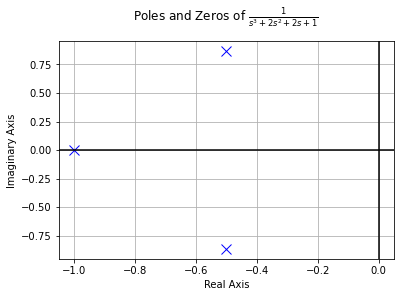

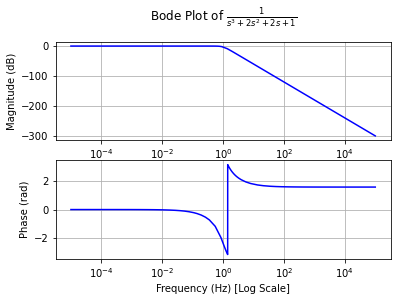

In [9]:
H=-MAI[1,0]/MAI[1,1]

H = cancel(H)

pprint(H)

Transf = TransferFunction.from_rational_expression(H,var =s)

print()
print()
print("Transference(H(s)): ")
pprint(Transf) # I

print()
print()
pole_zero_plot(Transf)

print()
print()
bode_plot(Transf)  
